# World Happiness 
### CS5010 Final Project - Preliminary Presentation
*Alicia Rice, Nathan England, Alicia Doan and John Carpenter*

### INTRODUCTION

- Project scenario
- Starting out, what did you hope to accomplish/learn? 

In the beginning of the project the team wanted to see if there were any trends with where people lived and the happiness score that their country received. As a team we wanted to know what factors affected the happiness score of the country.

### THE DATA
- Describe your data set and its significance. Where did you obtain this data set from?
- Why did you choose the data set that you did? 
- Indicate if you carried out any pre-processing/data cleaning/outlier removal, etc… to sanitize your data 

This data came from the kaggle that has thousands of open data sets that can be used worldwide. As a team we chose a dataset that contained the World Happiness Report that ranked 156 countries by their happiness levels. According to the source of this data, leading experts across many fields of study believe that the well being of their citizens can be used to "effectively assess the progress of nations."

The experts in the field created 6 factors that contribute to the happiness index: economic production, social support, life expectancy, freedom, absence of corruption, and generosity. These factors were gathered from a combination of a World Gallup poll and information about the country. The factors for each country is compared to an imaginary country called Dystopia, which has the world least happy people, in order to scale the results. 

We thought that this data would be very interesting to visualize on a map to see where in the world the happiest people live. It would be interesting to be able to use different criteria to adjust this map and maybe compare several maps based on several different views. 

Because our data was split up between 3 years there was some pre-processing that had to be done. We appended the datasets with each other and cleaned the column names to match.  We then saw that in 2017 the Region field was null so we used the previous years' data to fill in the gaps. 

**Import packages**

In [1]:
# import packages
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings            
warnings.filterwarnings("ignore") 

**import raw data**

In [2]:
df2015= pd.read_csv(r"C:\Users\jmcarpenter\Desktop\UVA Graduate School Stuff\CS_DataScience_5010\CS_5010\CS_Project\HappinessAnalysis\2015.csv")
df2016= pd.read_csv(r"C:\Users\jmcarpenter\Desktop\UVA Graduate School Stuff\CS_DataScience_5010\CS_5010\CS_Project\HappinessAnalysis\2016.csv")
df2017= pd.read_csv(r"C:\Users\jmcarpenter\Desktop\UVA Graduate School Stuff\CS_DataScience_5010\CS_5010\CS_Project\HappinessAnalysis\2017.csv")

**Pre-processing and data cleaning**

In [3]:
# Added column 'year' to each dataframe to prepare for stacking
df2015['year'] = 2015
df2016['year'] = 2016
df2017['year'] = 2017

# Reformatted columns in each data frame to prepare for stacking 
df2017= df2017.rename(columns={'Happiness.Rank': 'Happiness Rank', 'Happiness.Score':'Happiness Score',
       'Economy..GDP.per.Capita.':'Economy (GDP per Capita)',  'Health..Life.Expectancy.':'Health (Life Expectancy)',
       'Trust..Government.Corruption.':'Trust (Government Corruption)',
       'Dystopia.Residual':'Dystopia Residual'})

# Update country names to match across data frames  
df2017 = df2017.replace(to_replace ="Hong Kong S.A.R., China", 
                 value ="Hong Kong") 
df2017 = df2017.replace(to_replace ="Taiwan Province of China", 
                 value ="Taiwan") 

# Add column 'Region' to the 2017 dataframe
# Populate column using information within the 2015 and 2016 dataframes
region_df = df2016[['Country', 'Region']]
df2017 = df2017.merge(region_df, how = 'left', on = 'Country' )
stacked_data = df2015.append(df2016)
stacked_data = stacked_data.append(df2017)
sort=True # Rice: added to remove warning

# For output purposes to show all columns:
pd.set_option('display.max_columns', None)

#df = pd.read_csv('full_data.csv',header=0,encoding = "ISO-8859-1")
df = stacked_data

# Subset data to columns applicable to analysis
df = df.drop(['Lower Confidence Interval', 'Standard Error', 'Upper Confidence Interval', 'Whisker.high', 'Whisker.low'], axis = 1)

# Check for null values
df.isnull().sum()

# Investigate null Region values
df[df.Region.isnull()]

# 3 countries where Region is null
df[df.Country == 'Mozambique']
df[df.Country == 'Lesotho']
df[df.Country == 'Central African Republic']
# All three belong to Sub-Saharan Africa in years prior

# Replace nulls with Sub-Saharan-Africa
df[df.Region.isnull()] = df[df.Region.isnull()].fillna('Sub-Saharan Africa')

# Check for duplicates
df.duplicated().sum()
# 0 duplicates

# Change column names so easier to work with
df.columns=[each.split()[0] if(len(each.split())>2) else each.replace(" ","_") for each in df.columns]

### RESULTS 
- Display and discuss the results. 
- Describe what you have learned and mention the relevance/significance of the results you have obtained 

Include
- correlation matrix
- top few, bottom few
- grouped by year and region (put first)

**Data Queries and Vizualizations**

In [4]:
# Data exploration 
df.info() # Data Overview

<class 'pandas.core.frame.DataFrame'>
Int64Index: 470 entries, 0 to 154
Data columns (total 12 columns):
Country              470 non-null object
Dystopia_Residual    470 non-null float64
Economy              470 non-null float64
Family               470 non-null float64
Freedom              470 non-null float64
Generosity           470 non-null float64
Happiness_Rank       470 non-null int64
Happiness_Score      470 non-null float64
Health               470 non-null float64
Region               470 non-null object
Trust                470 non-null float64
year                 470 non-null int64
dtypes: float64(8), int64(2), object(2)
memory usage: 44.1+ KB


In [5]:
df.head() #First 5 rows

,Country,Dystopia_Residual,Economy,Family,Freedom,Generosity,Happiness_Rank,Happiness_Score,Health,Region,Trust,year
0,Switzerland,2.51738,1.39651,1.34951,0.66557,0.29678,1,7.587,0.94143,Western Europe,0.41978,2015
1,Iceland,2.70201,1.30232,1.40223,0.62877,0.43630,2,7.561,0.94784,Western Europe,0.14145,2015
2,Denmark,2.49204,1.32548,1.36058,0.64938,0.34139,3,7.527,0.87464,Western Europe,0.48357,2015
3,Norway,2.46531,1.45900,1.33095,0.66973,0.34699,4,7.522,0.88521,Western Europe,0.36503,2015
4,Canada,2.45176,1.32629,1.32261,0.63297,0.45811,5,7.427,0.90563,North America,0.32957,2015


In [6]:
df.describe() # Summary statistics of data frame columns: 470 observations

,Dystopia_Residual,Economy,Family,Freedom,Generosity,Happiness_Rank,Happiness_Score,Health,Trust,year
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,2.092717,0.927830,0.990347,0.402828,0.242241,78.829787,5.370728,0.579968,0.134790,2015.993617
std,0.565772,0.415584,0.318707,0.150356,0.131543,45.281408,1.136998,0.240161,0.111313,0.816907
min,0.328580,0.000000,0.000000,0.000000,0.000000,1.000000,2.693000,0.000000,0.000000,2015.000000
25%,1.737975,0.605292,0.793000,0.297615,0.152831,40.000000,4.509000,0.402301,0.059777,2015.000000
50%,2.094640,0.995439,1.025665,0.418347,0.223140,79.000000,5.282500,0.630053,0.099502,2016.000000
75%,2.455575,1.252443,1.228745,0.516850,0.315824,118.000000,6.233750,0.768298,0.173161,2017.000000
max,3.837720,1.870766,1.610574,0.669730,0.838075,158.000000,7.587000,1.025250,0.551910,2017.000000


In [7]:
# Unique years
print('There are ' + str(df.year.nunique()) + ' unique years in the data:\n') 
print(df.year.unique())

There are 3 unique years in the data:

[2015 2016 2017]


In [8]:
# Unique Regions
print('There are ' + str(df.Region.nunique()) + ' unique regions in the data:\n') 
print(df.Region.unique())

There are 10 unique regions in the data:

['Western Europe' 'North America' 'Australia and New Zealand'
 'Middle East and Northern Africa' 'Latin America and Caribbean'
 'Southeastern Asia' 'Central and Eastern Europe' 'Eastern Asia'
 'Sub-Saharan Africa' 'Southern Asia']


In [9]:
# Unique Countries
print('There are ' + str(df.Country.nunique()) + ' unique countries in the data:\n') 
print(df.Country.unique())

There are 164 unique countries in the data:

['Switzerland' 'Iceland' 'Denmark' 'Norway' 'Canada' 'Finland'
 'Netherlands' 'Sweden' 'New Zealand' 'Australia' 'Israel' 'Costa Rica'
 'Austria' 'Mexico' 'United States' 'Brazil' 'Luxembourg' 'Ireland'
 'Belgium' 'United Arab Emirates' 'United Kingdom' 'Oman' 'Venezuela'
 'Singapore' 'Panama' 'Germany' 'Chile' 'Qatar' 'France' 'Argentina'
 'Czech Republic' 'Uruguay' 'Colombia' 'Thailand' 'Saudi Arabia' 'Spain'
 'Malta' 'Taiwan' 'Kuwait' 'Suriname' 'Trinidad and Tobago' 'El Salvador'
 'Guatemala' 'Uzbekistan' 'Slovakia' 'Japan' 'South Korea' 'Ecuador'
 'Bahrain' 'Italy' 'Bolivia' 'Moldova' 'Paraguay' 'Kazakhstan' 'Slovenia'
 'Lithuania' 'Nicaragua' 'Peru' 'Belarus' 'Poland' 'Malaysia' 'Croatia'
 'Libya' 'Russia' 'Jamaica' 'North Cyprus' 'Cyprus' 'Algeria' 'Kosovo'
 'Turkmenistan' 'Mauritius' 'Hong Kong' 'Estonia' 'Indonesia' 'Vietnam'
 'Turkey' 'Kyrgyzstan' 'Nigeria' 'Bhutan' 'Azerbaijan' 'Pakistan' 'Jordan'
 'Montenegro' 'China' 'Zambia' 'R

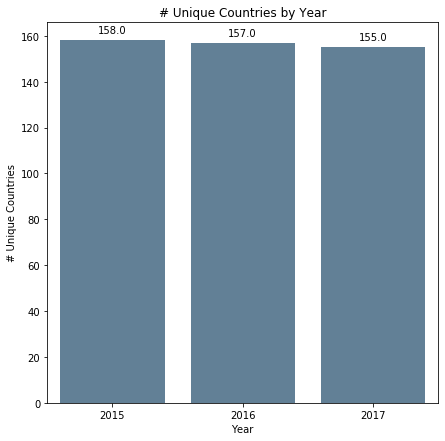

In [10]:
# Unique countries by year
year_country_count = df.groupby('year').Country.nunique().to_frame()
year_country_count.reset_index(inplace=True)
year_country_count

plt.figure(figsize=(7,7))
year_country_count_plot = sns.barplot(x=year_country_count['year'], y=year_country_count['Country'], palette=sns.color_palette("Blues_d", n_colors=1, desat=.5))
plt.xticks(rotation= 0)
plt.xlabel('Year')
plt.ylabel('# Unique Countries')
plt.title('# Unique Countries by Year') 
for p in year_country_count_plot.patches:
    year_country_count_plot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

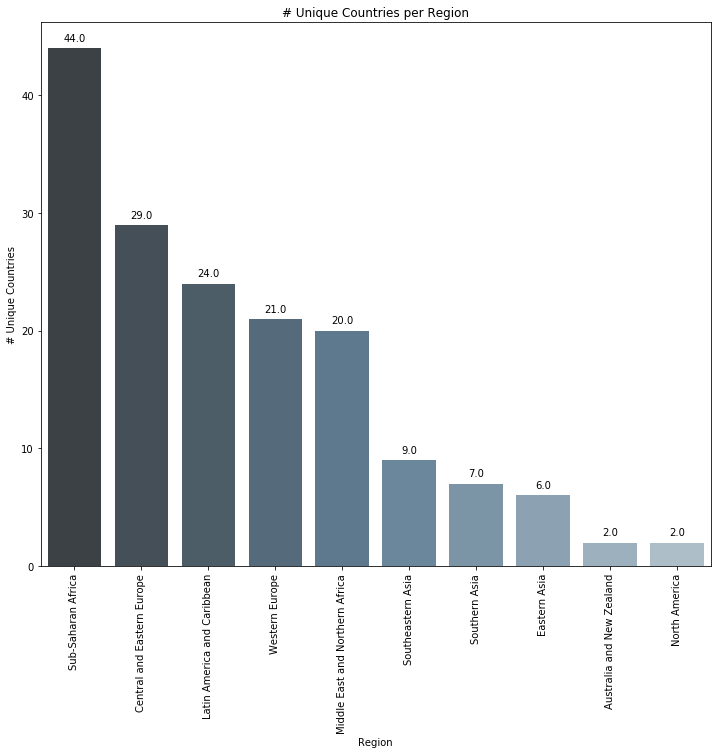

In [11]:
# Unique countries by Region
region_country_count = df.groupby('Region').Country.nunique().to_frame()
region_country_count.reset_index(inplace=True)
region_country_count = region_country_count.sort_values(by = ['Country'], ascending = False)
region_country_count

plt.figure(figsize=(12, 10))
region_country_count_plot = sns.barplot(x=region_country_count['Region'], y=region_country_count['Country'], palette=sns.color_palette("Blues_d", n_colors=10, desat=.5))
plt.xticks(rotation= 90)
plt.xlabel('Region')
plt.ylabel('# Unique Countries')
plt.title('# Unique Countries per Region') 
for p in region_country_count_plot.patches:
    region_country_count_plot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

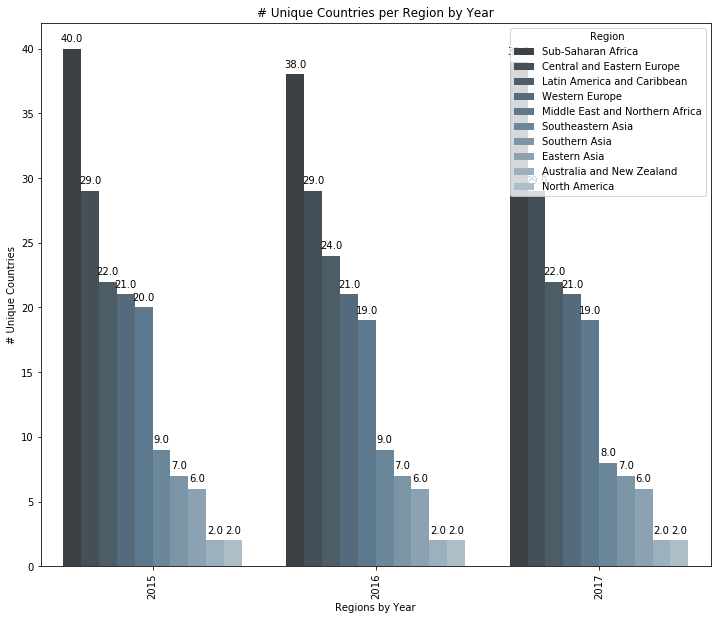

In [12]:
# Unique countries by year and Region
year_region_country_count = df.groupby(['year', 'Region']).Country.nunique().to_frame()
year_region_country_count.reset_index(inplace=True)
year_region_country_count = year_region_country_count.sort_values(by = ['year', 'Country'], ascending = False)
year_region_country_count

plt.figure(figsize=(12, 10))
year_region_country_count_plot = sns.barplot(x=year_region_country_count['year'], y=year_region_country_count['Country'], hue = year_region_country_count['Region'], palette=sns.color_palette("Blues_d", n_colors=10, desat=.5))
plt.xticks(rotation= 90)
plt.xlabel('Regions by Year')
plt.ylabel('# Unique Countries')
plt.title('# Unique Countries per Region by Year') 
for p in year_region_country_count_plot.patches:
    year_region_country_count_plot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

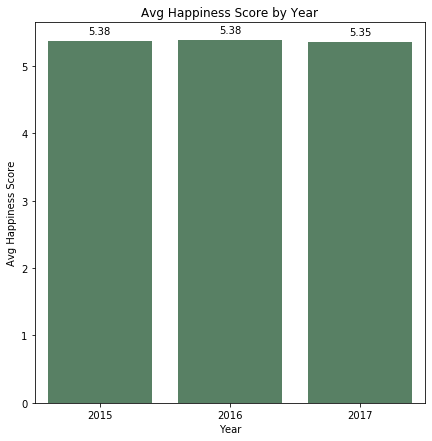

In [13]:
# Average Happiness Score by year
year_happy_score = df.groupby('year').Happiness_Score.mean().to_frame()
year_happy_score.reset_index(inplace=True)
year_happy_score

plt.figure(figsize=(7,7))
year_happy_score_plot = sns.barplot(x=year_happy_score['year'], y=year_happy_score['Happiness_Score'], palette=sns.color_palette("Greens_d", n_colors=1, desat=.5))
plt.xticks(rotation= 0)
plt.xlabel('Year')
plt.ylabel('Avg Happiness Score')
plt.title('Avg Happiness Score by Year') 
for p in year_happy_score_plot.patches:
    year_happy_score_plot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

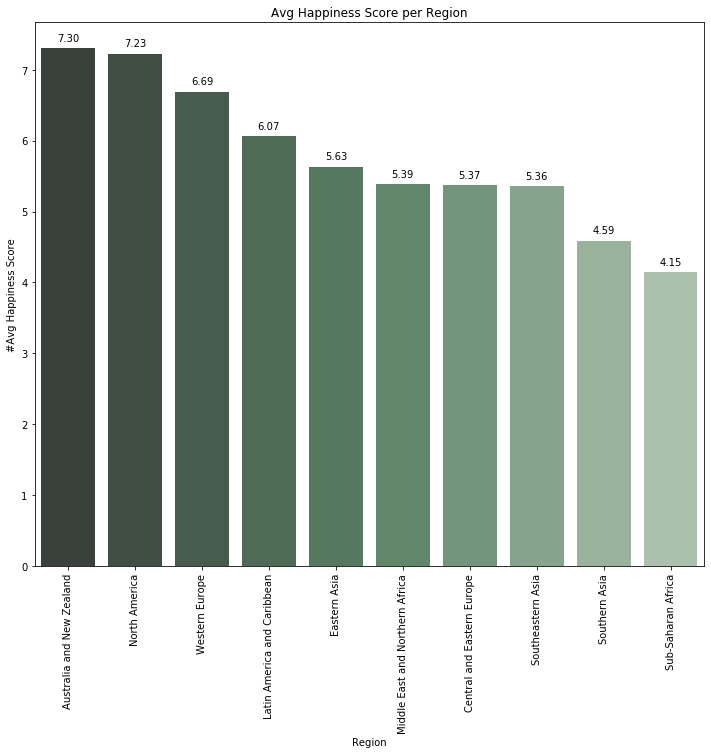

In [14]:
# Average Happiness Score by Region
region_happy_score = df.groupby('Region').Happiness_Score.mean().to_frame()
region_happy_score.reset_index(inplace=True)
region_happy_score  = region_happy_score .sort_values(by = ['Happiness_Score'], ascending = False)
region_happy_score 

plt.figure(figsize=(12, 10))
region_happy_score_plot = sns.barplot(x=region_happy_score ['Region'], y=region_happy_score ['Happiness_Score'], palette=sns.color_palette("Greens_d", n_colors=10, desat=.5))
plt.xticks(rotation= 90)
plt.xlabel('Region')
plt.ylabel('#Avg Happiness Score')
plt.title('Avg Happiness Score per Region') 
for p in region_happy_score_plot.patches:
    region_happy_score_plot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

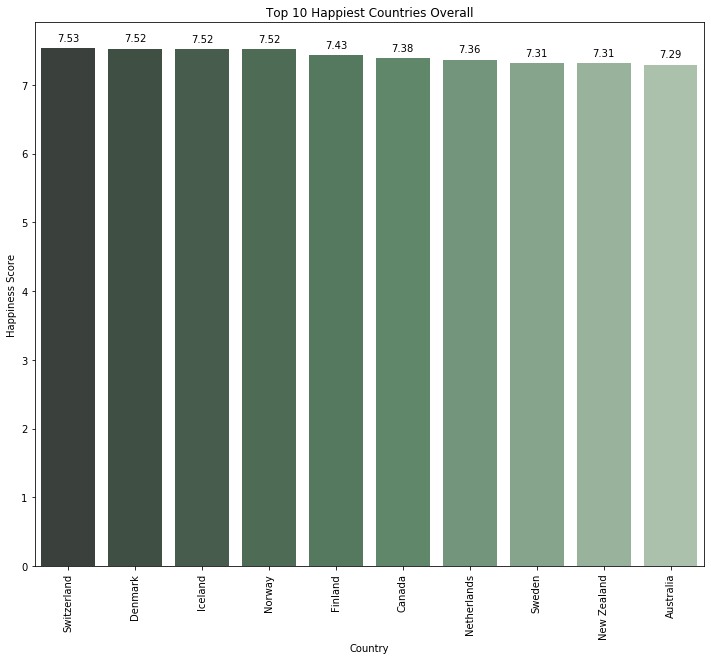

In [15]:
# Top 10 Happiest Countries Overall
happiest_overall = df.groupby('Country').Happiness_Score.mean().to_frame()
happiest_overall.reset_index(inplace=True)
happiest_overall = happiest_overall.sort_values(by = ['Happiness_Score'], ascending = False).head(10)
happiest_overall

plt.figure(figsize=(12, 10))
happiest_overall_plot = sns.barplot(x=happiest_overall['Country'], y=happiest_overall['Happiness_Score'], palette=sns.color_palette("Greens_d", n_colors=10, desat=.5))
plt.xticks(rotation= 90)
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Top 10 Happiest Countries Overall') 
for p in happiest_overall_plot.patches:
    happiest_overall_plot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

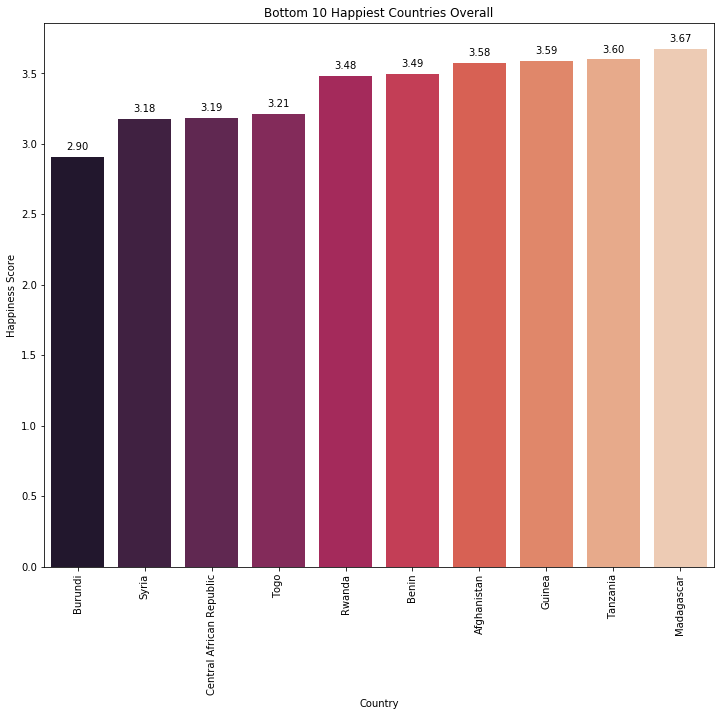

In [16]:
# Bottom 10 Happiest Countries Overall
unhappiest_overall = df.groupby('Country').Happiness_Score.mean().to_frame()
unhappiest_overall.reset_index(inplace=True)
unhappiest_overall = unhappiest_overall.sort_values(by = ['Happiness_Score'], ascending = True).head(10)
unhappiest_overall

plt.figure(figsize=(12, 10))
unhappiest_overall_plot = sns.barplot(x=unhappiest_overall['Country'], y=unhappiest_overall['Happiness_Score'], palette='rocket')
plt.xticks(rotation= 90)
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Bottom 10 Happiest Countries Overall') 
for p in unhappiest_overall_plot.patches:
    unhappiest_overall_plot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

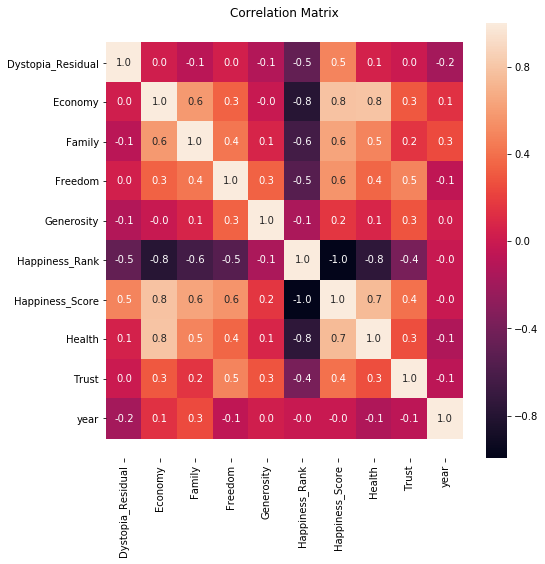

In [17]:
# Correlation Matrix of Factors
f,ax = plt.subplots(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,fmt='.1f',ax=ax)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Correlation Matrix')
plt.show()

<Figure size 360x360 with 0 Axes>

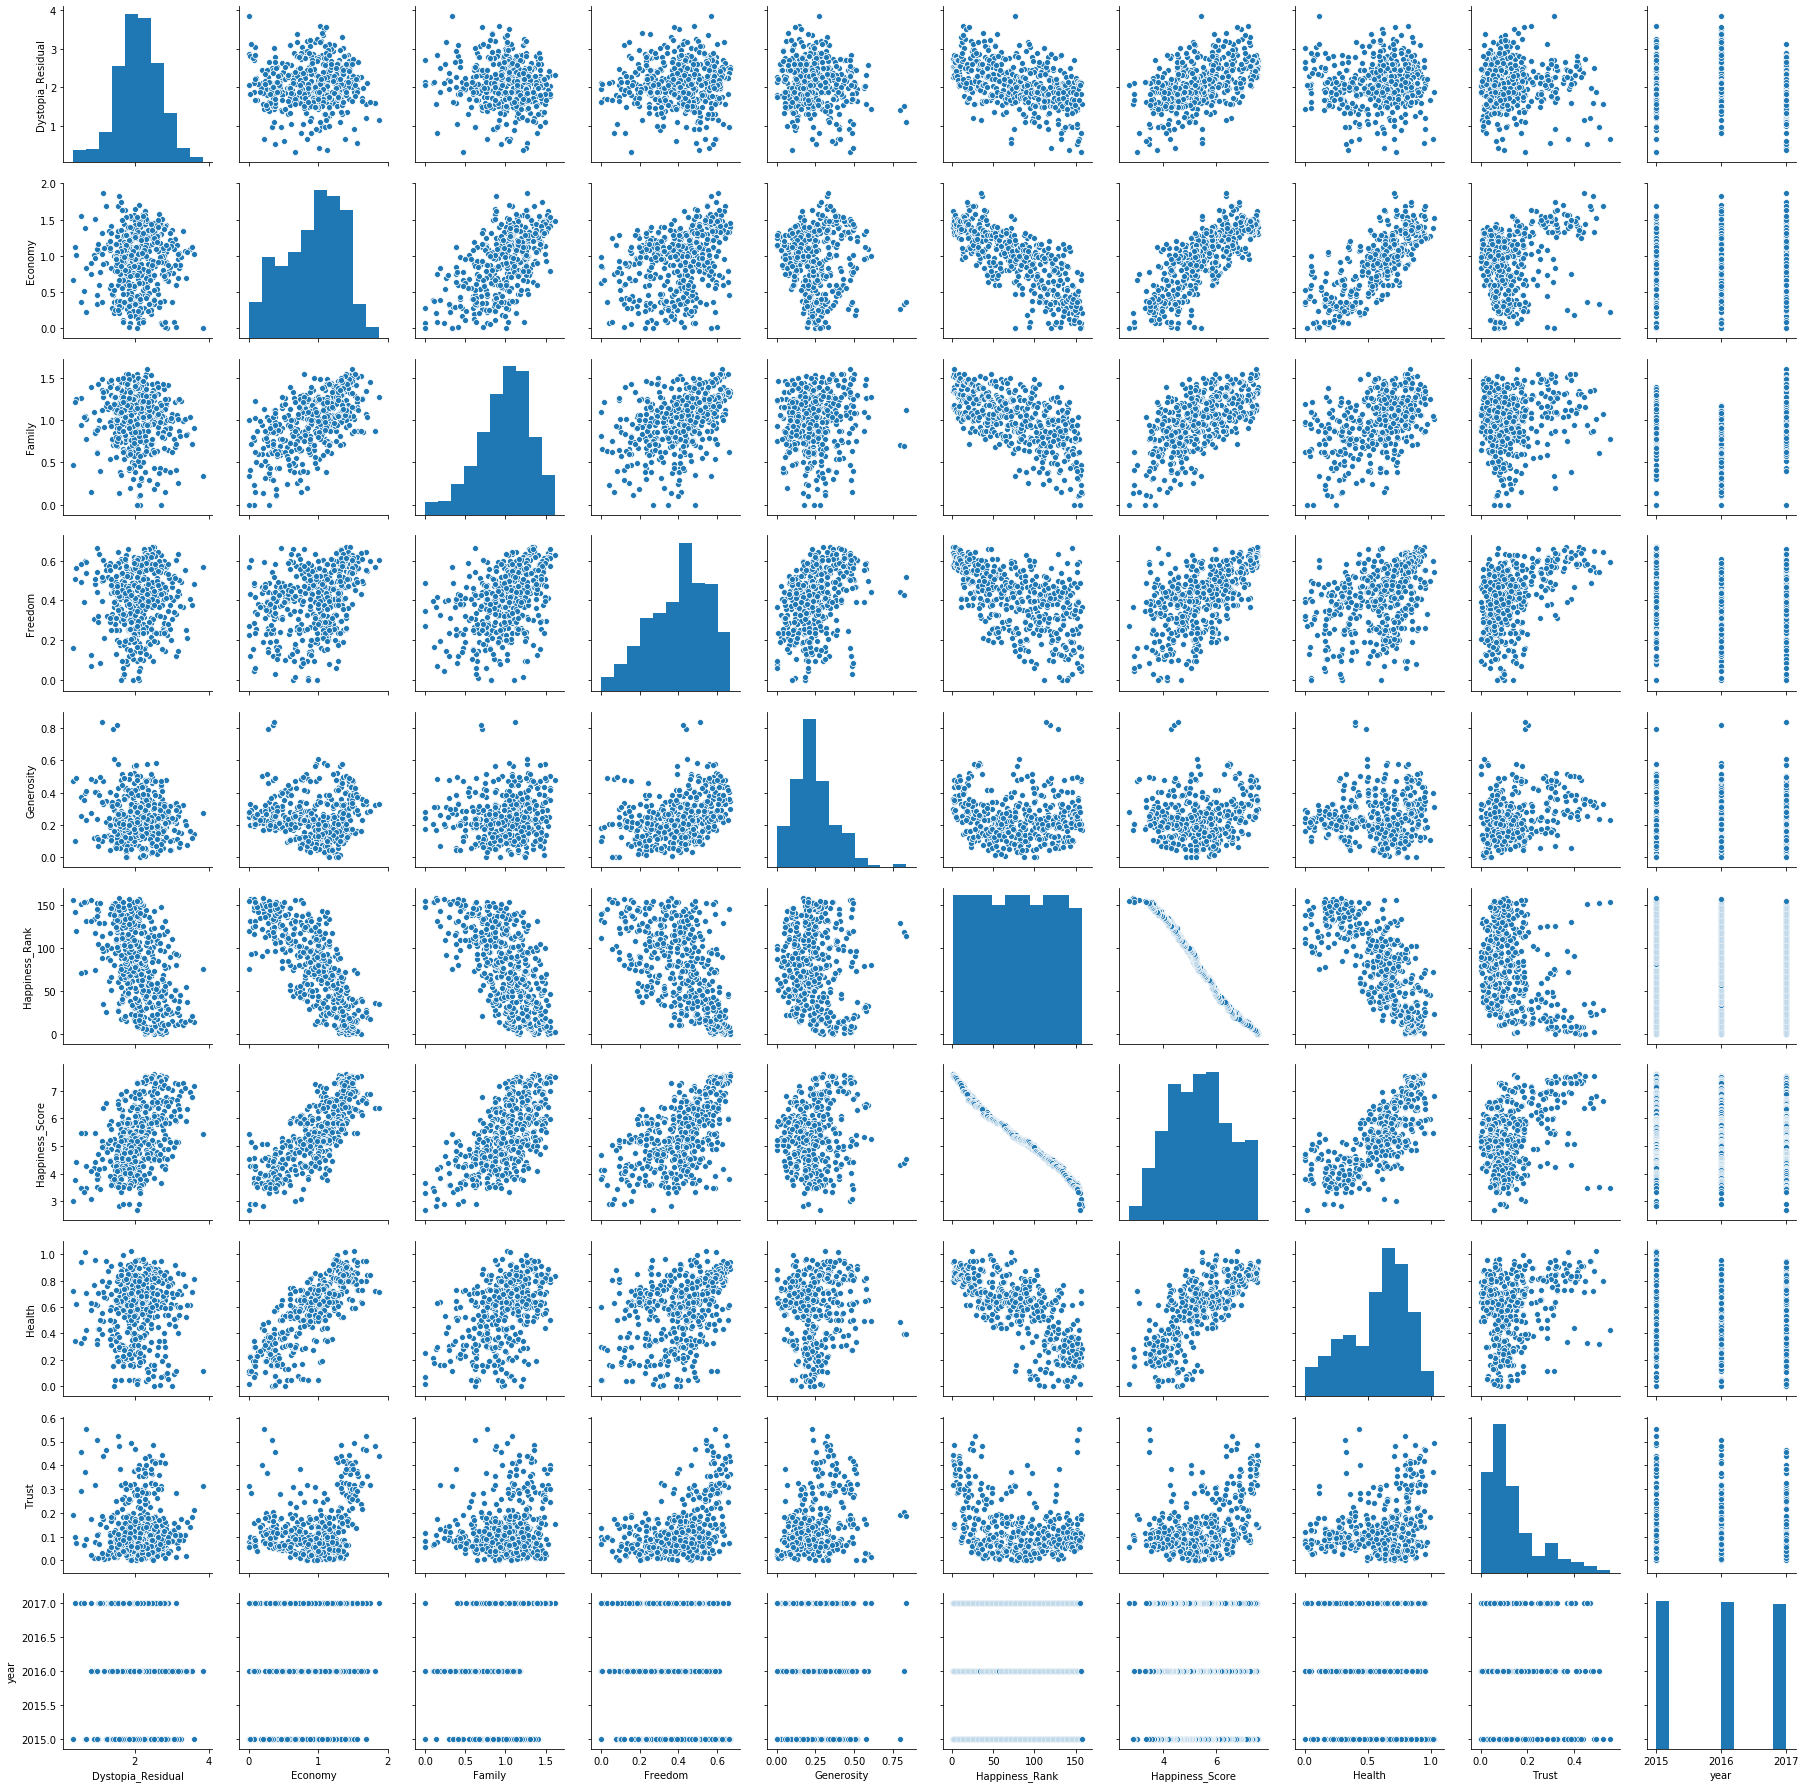

In [18]:
#Correlation Plots
plt.figure(figsize=(5, 5))
sns.pairplot(df)
plt.show()

### BEYOND THE ORIGINAL SPECIFICATIONS 
- Highlight clearly what things you did that went beyond the original specifications. 
  - Discuss what you implemented that would count towards the extra-credit portion of this project (see section below.) 
- Web-scraping to obtain your data set instead of downloading a ready-made data set from a source
- Have some user-interaction where you may obtain some more data from a user (if appropriate) 
- Have some user-interaction where the user may choose the kinds of queries to perform on the data. 
  - Retrieve/display only the appropriate result 
- Use advanced queries or manipulate the data in another way (other data manipulation methods, etc..) and display the results. 
  - If you choose to do this, mention in your write-up how this goes beyond the basic/general queries you initially used 

In [19]:
#gapminder
gapminder = px.data.gapminder().query("year==2007")
df = stacked_data.merge(gapminder[['country', 'iso_alpha']], how = 'left', left_on = "Country", right_on = "country" )

**Map Visualization with user-interaction**

In [24]:
import plotly.express as px

# User input
print("Please input a year and column you'd like to analyze.\nPick between 2015,2016,2017")
print("Enter a year:\n")
try:
    year = int(input().strip())
except ValueError as err:
    print(err)
    print("That wasn't a valid year.")
    raise

print("Enter a column to analyze: \n")
print("You may pick from the following selections: \n")
print("Dystopia Residual\nEconomy (GDP per Capita)\nFamily\nFreedom\nGenerosity\nHappiness Rank\nHappiness Score\nHealth (Life Expectancy)\nLower Confidence Interval\nStandard Error\nTrust (Government Corruption)\nUpper Confidence Interval\nWhisker.high\nWhisker.low")
column = input().strip()
if year == 2016:
    try:
        column = input().strip()
        fig = px.choropleth(df[df['year'] == year],locations="iso_alpha",color="{}".format(column),
                            hover_name="Country",color_continuous_scale=px.colors.sequential.Hot)
        fig.show()
    except IOError as err:
        print(err)

elif year == 2017:
    try:
        column = input().strip()
        fig = px.choropleth(df[df['year'] == year],locations="iso_alpha",color="{}".format(column),
                            hover_name="Country",color_continuous_scale=px.colors.sequential.Hot)
        fig.show()
    except IOError as err:
        print(err) 
else:
    raise Exception("That wasn't a valid column entry.")
        
  
            
        
  
            

Please input a year and column you'd like to analyze.
Pick between 2015,2016,2017
Enter a year:

STRING
invalid literal for int() with base 10: 'STRING'
That wasn't a valid year.


ValueError: invalid literal for int() with base 10: 'STRING'

In [ ]:
### TESTING 
- Describe what testing you did. 
- Describe the Unit tests that you wrote. 
  - Show a sample run of one or two of your tests (screen caps or copy-and-paste is fine) 

### CONCLUSIONS 
- Summarize your findings, explain how these results could be used by others (if applicable), describe ways you could improve your program or ways you might like to expand the functionality of your program if given more time 